In [4]:
import cv2
import glob
import os
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import method_dataframe
import method_graph
import method_draw

In [5]:
# load result_df
file_name = 'v8n_org_100best'+'.csv'
csv_path = r'C:\Users\Ino\Desktop\NextChip\Minions_git\result\data_result'
result_df = pd.read_csv(rf'{csv_path}\{file_name}', index_col= 0)
display(result_df.sort_values('size'))

,file_name,class,dt_condition,size,iou_tf,class_tf,pred_cls,iou,conf
25022,3514.txt,per,pos_clsT,30.0,positive,1,per,0.038462,0.002473
25004,3514.txt,per,pos_clsT,33.0,positive,1,per,0.071895,0.002473
20555,3186.txt,car,pos_clsT,35.0,positive,1,car,0.115385,0.004070
23192,3437.txt,per,pos_clsT,36.0,positive,1,per,0.148148,0.010987
27978,3696.txt,per,pos_clsF,40.0,positive,0,tru,0.219780,0.017986
...,...,...,...,...,...,...,...,...,...
10257,1761.txt,tru,Detect,342125.0,True,1,tru,0.872971,0.817575
9834,1687.txt,tru,pos_clsT,394626.0,positive,1,tru,0.058572,0.182426
9860,1694.txt,car,Detect,407511.0,True,1,car,0.928540,0.731059
9831,1686.txt,tru,conf_lack,410400.0,True,1,tru,0.605910,0.006693


In [36]:
#display(result_df.sort_values(by= ['box_size']))

In [37]:
# # show size
# trues = [0.7953125, 0.4097222222222222, 0.1671875, 0.2722222222222222]
# preds = [0, 0, 0, 0]
# iou, bbox = dataframe_method.get_IoU(trues, preds)
# print('bbox size is', bbox)
# file_name = '5807.txt'

# # show Bbox
# txt_path = rf'C:\Users\Ino\Desktop\NextChip\dataset\labels\test\{file_name}'
# draw_method.draw_box(txt_path, 0, (1280, 720))

In [6]:
# box size별 정확도

# range 설정
bin = [0, 700, 1900, 7500, 921600]

# size별로 df 필터링
xsmall_df = result_df[(bin[0] <= result_df['size']) & (result_df['size'] < bin[1])]
small_df = result_df[(bin[1] <= result_df['size']) & (result_df['size'] < bin[2])]
medium_df = result_df[(bin[2] <= result_df['size']) & (result_df['size'] < bin[3])]
medium2_df = result_df[(bin[3] <= result_df['size']) & (result_df['size'] < bin[4])]
# large_df = result_df[(bin[4] <= result_df['size']) & (result_df['size'] < bin[5])]

# display(xsmall_df.sort_values(by= ['size']))
# display(small_df.sort_values(by= ['size']))
# display(medium_df.sort_values(by= ['size']))
# display(large_df.sort_values(by= ['size']))

In [11]:
def make_acc(df):
    acc = len(df[(df['dt_condition'] == 'Detect') | (df['dt_condition'] == 'lack_conf') | (df['dt_condition'] == 'only_pos')]) / len(df)
    print(round(acc*100, 3), 'num is', len(df[(df['dt_condition'] == 'True') | (df['dt_condition'] == 'lack_conf') | (df['dt_condition'] == 'only_pos')]), len(df))
    
    return round(acc*100, 2) #, len(df[(df['detect_tf'] == 'True') | (df['detect_tf'] == 'lack_conf')]), len(df)

In [12]:
acc1 = make_acc(xsmall_df)
acc2 = make_acc(small_df)
acc3 = make_acc(medium_df)
acc4 = make_acc(medium2_df)

25.999 num is 0 14762
51.126 num is 0 12082
69.728 num is 0 12708
84.879 num is 0 10515


In [13]:
print(acc1)

26.0


Text(0.5, 1.0, 'Acc_by_box_size')

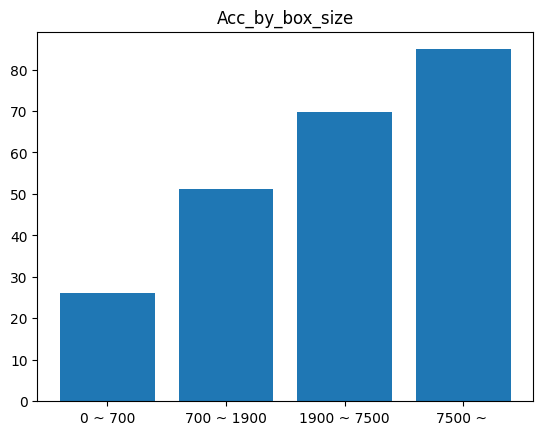

In [14]:
x = ['0 ~ 700', '700 ~ 1900', '1900 ~ 7500', '7500 ~ ']
y = [acc1, acc2, acc3, acc4]
plt.bar(x, y)
plt.title('Acc_by_box_size')

In [15]:
make_acc(xsmall_df, 'True')

TypeError: make_acc() takes 1 positional argument but 2 were given

In [41]:
# acc by size

acc_of_xsmall = len(xsmall_df[xsmall_df['detect_tf'] == 'True']) / (len(xsmall_df))
print('acc_of_x is ', round(acc_of_xsmall*100, 3), ', num of x is', len(xsmall_df))

acc_of_small = len(small_df[small_df['detect_tf'] == 'True']) / (len(small_df))
print('acc_of_s is ', round(acc_of_small*100, 3), ', num of s is', len(small_df))

acc_of_medium = len(medium_df[medium_df['detect_tf'] == 'True']) / (len(medium_df))
print('acc_of_m is', round(acc_of_medium*100, 3), ', num of m is', len(medium_df))

acc_of_medium2 = len(medium2_df[medium2_df['detect_tf'] == 'True']) / (len(medium2_df))
print('acc_of_m2 is', round(acc_of_medium2*100, 3), ', num of m2 is', len(medium2_df))

acc_of_large = len(large_df[large_df['detect_tf'] == 'True']) / (len(large_df))
print('acc_of_l is', round(acc_of_large*100, 3), ', num of l is', len(large_df))

print(len(xsmall_df) + len(small_df) + len(medium_df) + len(medium2_df) + len(large_df) + len(result_df[result_df['size'] == -100])) 
print(len(result_df))

acc_of_x is  0.007 , num of x is 14867
acc_of_s is  0.141 , num of s is 12054
acc_of_m is 0.277 , num of m is 12637
acc_of_m2 is 0.19 , num of m2 is 10509
acc_of_l is 0.243 , num of l is 22635
72702
50067


In [4]:
# class별 정확도
true_df = method_dataframe.get_ratio(r'C:\Users\Ino\Desktop\NextChip\dataset\labels\test')

progress is 14.53%
progress is 29.06%
progress is 43.59%
progress is 58.11%
progress is 72.64%
progress is 87.17%


In [7]:
display(true_df.sort_values('file_name'))

,file_name,class,size
0,0.txt,car,5544
1,0.txt,car,150
2,0.txt,car,140
3,1.txt,car,8308
4,1.txt,car,130
...,...,...,...
50064,999.txt,car,518
50065,999.txt,car,512
50062,999.txt,car,988
50063,999.txt,tru,450


In [1]:
import method_dataframe
add_df1 = method_dataframe.get_ratio(r'C:\Users\Ino\Desktop\NextChip\dataset\labels\add\bus_truck')

progress is 12.67%
err -> 182.txt
progress is 25.35%
err -> 219.txt
err -> 227.txt
err -> 227.txt
progress is 38.02%
progress is 50.7%
progress is 63.37%
progress is 76.05%
progress is 88.72%
progress is 100.0%


In [2]:
add_df2 = method_dataframe.get_ratio(r'C:\Users\Ino\Desktop\NextChip\dataset\labels\add\cyc')

progress is 10.65%
progress is 21.31%
progress is 31.96%
progress is 42.62%
progress is 53.27%
progress is 63.92%
progress is 74.58%
progress is 85.23%
progress is 95.89%
progress is 100.0%


In [4]:
add_df3 = method_dataframe.get_ratio(r'C:\Users\Ino\Desktop\NextChip\dataset\labels\add\mot')

progress is 19.96%
progress is 39.92%
progress is 59.88%
progress is 79.84%
progress is 99.8%
progress is 100.0%


In [5]:
display(add_df1)

,file_name,class,size
0,1.txt,tru,420264.741065
1,1.txt,tru,105610.658665
2,10.txt,tru,215058.113208
3,10.txt,tru,69574.641509
4,10.txt,tru,27761.111728
...,...,...,...
20854,998.txt,tru,13733.280000
20855,999.txt,tru,3978.000000
20856,999.txt,tru,4488.000000
20857,999.txt,tru,40446.000000


In [ ]:
# class에 따른 bix size별 정확도